# Grid Search
This notebook contatins code used to run grid search on all tree algorithms plus 

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from data_helper import DataHelper
from grid_search import MyGridSearch
from models.monthly_average import MonthlyAverageClassifier
import pandas as pd

In [15]:
dh = DataHelper()
days = dh.get_all_days_list()

data = []
for day in days:
    data.append(day.get_normalized_data())

df = pd.concat(data)
df.describe()

,pool,lines_reserved,day_of_week,month,day,hour,minute,holiday,reserved_Lavoda,reserved_Club Junior,...,reserved_Sidorovich,reserved_OS DUFA,temperature_binned,wind_binned,humidity_binned,precipitation_binned,pressure_binned,reserved_other,minute_of_day,year
count,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,...,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000,129440.000000
mean,0.262665,0.147721,0.480038,0.530958,0.508624,0.543929,0.456761,0.006528,0.005098,0.003546,...,0.000324,0.000985,0.545744,0.278331,0.696574,0.058516,0.481248,0.003710,0.562960,0.329652
std,0.187076,0.163748,0.326740,0.290442,0.285696,0.209330,0.288782,0.080533,0.024724,0.020753,...,0.006360,0.014855,0.255139,0.204270,0.228110,0.166110,0.226437,0.029296,0.209493,0.064491
min,0.000000,0.000000,0.000000,0.083333,0.032258,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.200000
25%,0.125000,0.000000,0.166667,0.250000,0.258065,0.375000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.285714,0.200000,0.500000,0.000000,0.250000,0.000000,0.392361,0.300000
50%,0.220000,0.125000,0.500000,0.500000,0.516129,0.541667,0.416667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.571429,0.200000,0.750000,0.000000,0.500000,0.000000,0.565972,0.300000
75%,0.407500,0.250000,0.666667,0.833333,0.741935,0.708333,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.714286,0.400000,0.750000,0.000000,0.500000,0.000000,0.743056,0.400000
max,0.945000,1.000000,1.000000,1.000000,1.000000,0.916667,0.983333,1.000000,0.125000,0.125000,...,0.125000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,0.400000


In [7]:
parameteres = {	'n_estimators': [30],
                'max_depth': [20,35,50],
                'min_samples_split':[2, 3, 5],
                'min_samples_leaf':[1,2,5],
                'max_features':[20,40,60],
                'max_leaf_nodes':[None]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
columns = list(dh.get_all_columns_names())
columns.remove('time')
mgs = MyGridSearch('RandomForestRegressor',parameteres)
mgs.fit(columns)

1 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=20, max_leaf_nodes=None) with score 734.5, best MSE so far = 734.5
2 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 787.6, best MSE so far = 734.5
3 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=60, max_leaf_nodes=None) with score 909.1, best MSE so far = 734.5
4 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=20, max_leaf_nodes=None) with score 798.9, best MSE so far = 734.5
5 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=20, min_sa

38 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=3, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 838.2, best MSE so far = 728.3
39 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=3, min_samples_leaf=1, max_features=60, max_leaf_nodes=None) with score 894.8, best MSE so far = 728.3
40 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=3, min_samples_leaf=2, max_features=20, max_leaf_nodes=None) with score 740.7, best MSE so far = 728.3
41 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=3, min_samples_leaf=2, max_features=40, max_leaf_nodes=None) with score 961.1, best MSE so far = 728.3
42 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=35, m

75 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=50, min_samples_split=5, min_samples_leaf=1, max_features=60, max_leaf_nodes=None) with score 957.4, best MSE so far = 728.3
76 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=50, min_samples_split=5, min_samples_leaf=2, max_features=20, max_leaf_nodes=None) with score 739.9, best MSE so far = 728.3
77 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=50, min_samples_split=5, min_samples_leaf=2, max_features=40, max_leaf_nodes=None) with score 863.3, best MSE so far = 728.3
78 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=50, min_samples_split=5, min_samples_leaf=2, max_features=60, max_leaf_nodes=None) with score 929.4, best MSE so far = 728.3
79 out of 81 done for parameters RandomForestRegressor(random_state=17, n_estimators=30, max_depth=50, m

In [17]:
time_step_back = 10
parameteres = {	'n_estimators': [50],
                'max_depth': [35],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'max_features':[40],
                'max_leaf_nodes':[None]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
columns = list(dh.get_all_columns_names())
columns.remove('time')
mgs = MyGridSearch('ExtraTreesRegressor',parameteres)
mgs.fit(columns, time_step_back)

1 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=30, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 701.1, best MSE so far = 701.1
2 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=50, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 680.5, best MSE so far = 680.5
3 out of 3 done for parameters ExtraTreesRegressor(random_state=17, n_estimators=100, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None) with score 678.7, best MSE so far = 678.7
GridSearch for ExtraTreesRegressor done.
Best MSE = 678.7 for parameters:
{'n_estimators': 100, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 40, 'max_leaf_nodes': None}
Saving best estimator


1 out of 18 done for parameters ExtraTreesClassifier(random_state=17, n_estimators=10, max_depth=10, min_samples_split=2, min_samples_leaf=1) with score 10570.2, best MSE so far = 10570.2
2 out of 18 done for parameters ExtraTreesClassifier(random_state=17, n_estimators=10, max_depth=10, min_samples_split=2, min_samples_leaf=2) with score 12131.7, best MSE so far = 10570.2
3 out of 18 done for parameters ExtraTreesClassifier(random_state=17, n_estimators=10, max_depth=10, min_samples_split=5, min_samples_leaf=1) with score 8723.9, best MSE so far = 8723.9
4 out of 18 done for parameters ExtraTreesClassifier(random_state=17, n_estimators=10, max_depth=10, min_samples_split=5, min_samples_leaf=2) with score 12975.6, best MSE so far = 8723.9
5 out of 18 done for parameters ExtraTreesClassifier(random_state=17, n_estimators=10, max_depth=10, min_samples_split=10, min_samples_leaf=1) with score 11710.6, best MSE so far = 8723.9
6 out of 18 done for parameters ExtraTreesClassifier(random_sta

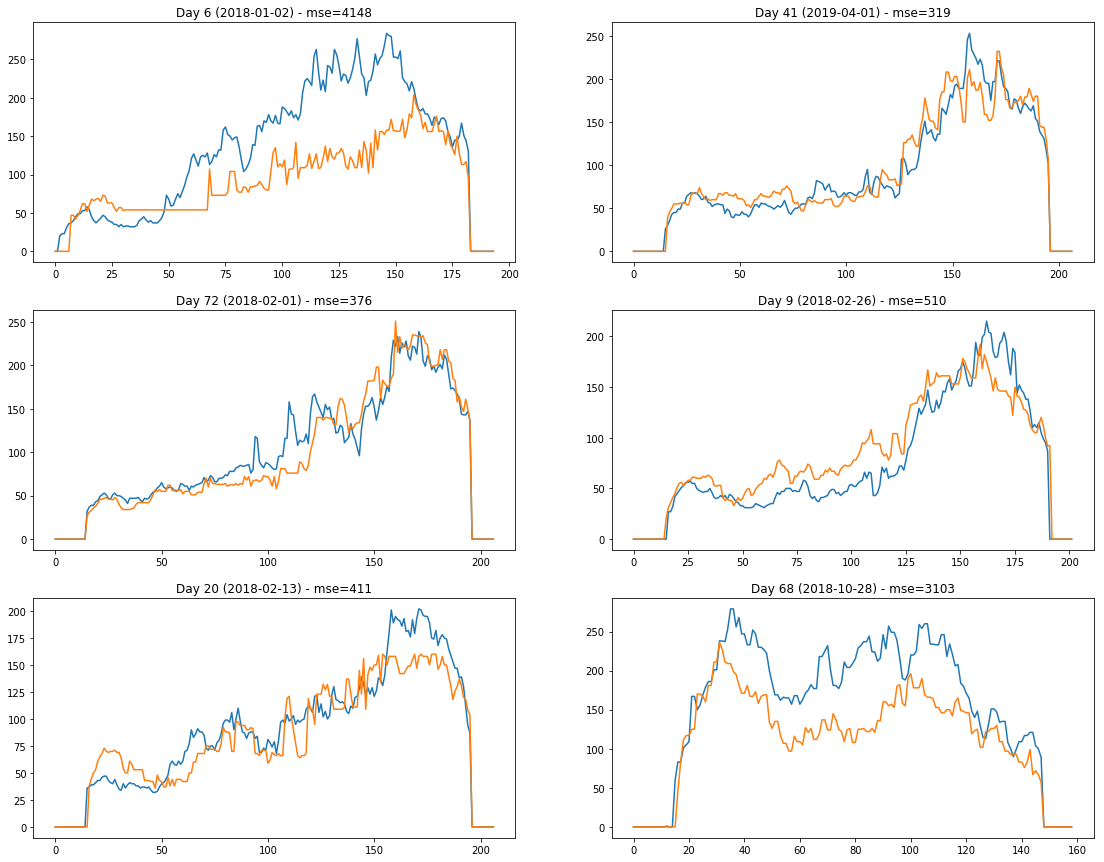

In [12]:
#(random_state=17, n_estimators=10, max_depth=50, min_samples_split=5, min_samples_leaf=2) ,ts = 10, mse = 1146

dh = DataHelper()
time_step_back = 10
parameteres = {	'n_estimators': [10],
                'max_depth': [50],
                'min_samples_split':[5],
                'min_samples_leaf':[2]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
# columns = list(dh.get_all_columns_names())
# columns.remove('time')
mgs = MyGridSearch('ExtraTreesClassifier',parameteres)
mgs.fit(columns, time_step_back)
dh.show_n_days_prediction(mgs.best_estimator, columns, 6, time_step_back)

1 out of 12 done for parameters RandomForestClassifier(random_state=17, n_estimators=10, max_depth=30, min_samples_split=2, min_samples_leaf=1) with score 2890.6, best MSE so far = 2890.6
2 out of 12 done for parameters RandomForestClassifier(random_state=17, n_estimators=10, max_depth=30, min_samples_split=2, min_samples_leaf=2) with score 1488.4, best MSE so far = 1488.4
3 out of 12 done for parameters RandomForestClassifier(random_state=17, n_estimators=10, max_depth=30, min_samples_split=5, min_samples_leaf=1) with score 1644.1, best MSE so far = 1488.4
4 out of 12 done for parameters RandomForestClassifier(random_state=17, n_estimators=10, max_depth=30, min_samples_split=5, min_samples_leaf=2) with score 1915.2, best MSE so far = 1488.4
5 out of 12 done for parameters RandomForestClassifier(random_state=17, n_estimators=10, max_depth=30, min_samples_split=10, min_samples_leaf=1) with score 2133.3, best MSE so far = 1488.4
6 out of 12 done for parameters RandomForestClassifier(rand

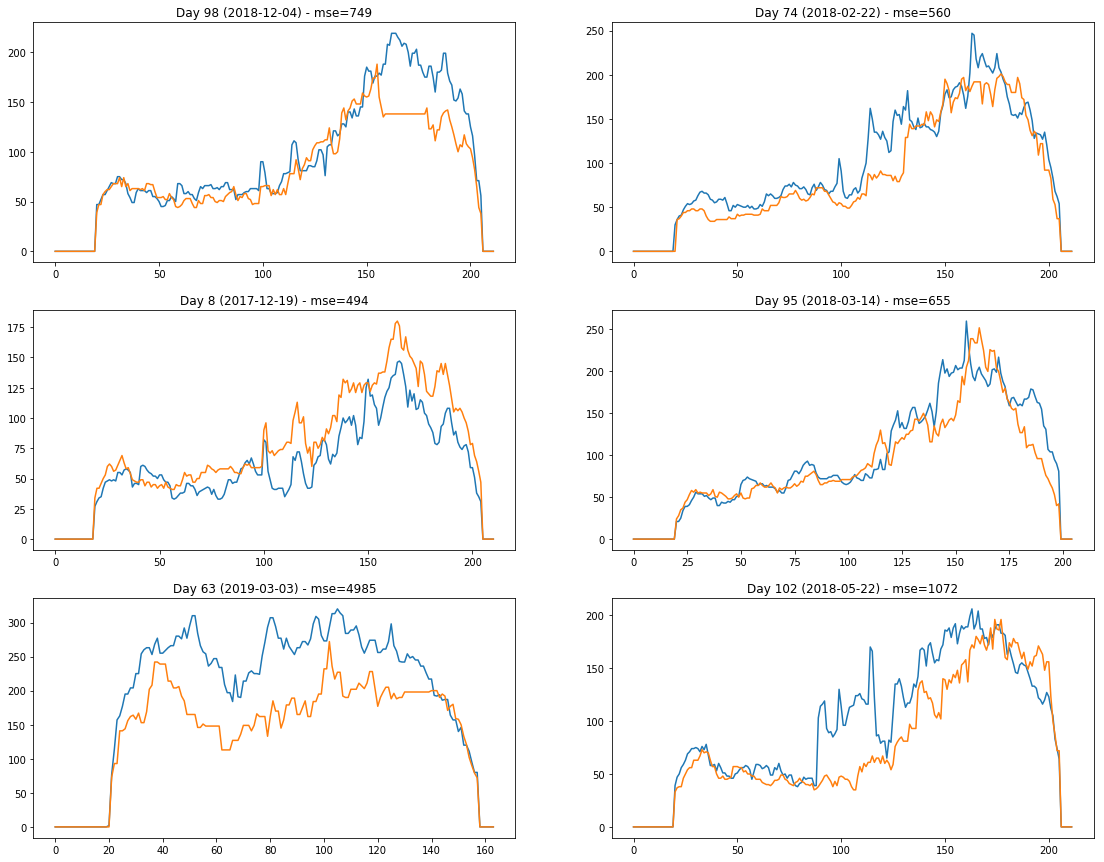

In [14]:
dh = DataHelper()
time_step_back = 5
parameteres = {	'n_estimators': [10],
                'max_depth': [30,50],
                'min_samples_split':[2,5,10],
                'min_samples_leaf':[1,2]}
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']
# columns = list(dh.get_all_columns_names())
# columns.remove('time')
mgs = MyGridSearch('RandomForestClassifier',parameteres)
mgs.fit(columns, time_step_back)
dh.show_n_days_prediction(mgs.best_estimator, columns, 6, time_step_back)

In [3]:
dh = DataHelper()
columns = ['pool','day_of_week','month','minute_of_day', 'year', 'reserved_Vodnik','lines_reserved']

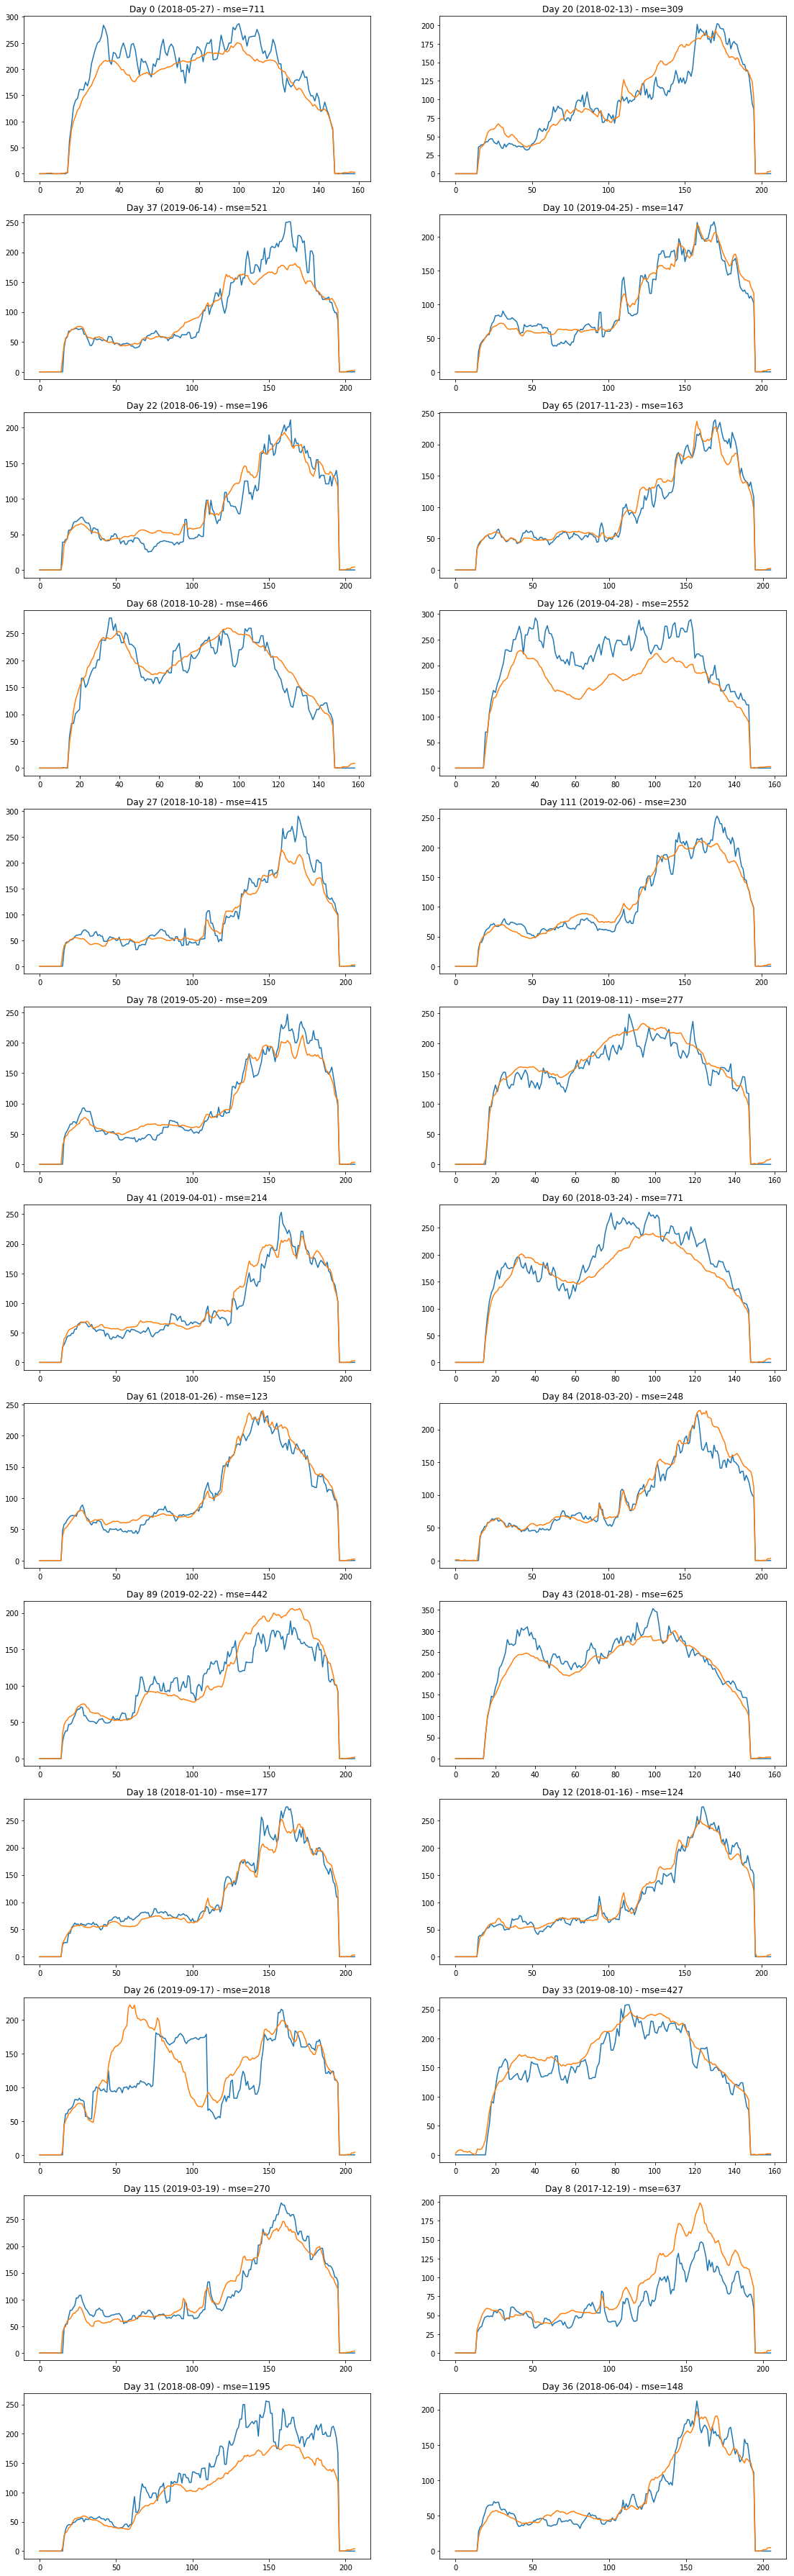

In [18]:
dh.show_n_days_prediction(mgs.best_estimator, columns, days=26, time_steps_back=time_step_back)

In [18]:
mac = MonthlyAverageClassifier()
columns = list(dh.get_all_columns_names())
columns.remove('time')
mac.fit(dh.get_training_days(), columns)
score = dh.mse_on_testing_days(mac, columns)
print('MSE = %.1f' % (score))

MSE = 978.6
